####   Assignment : Fingerprint Recognition Using SIFT Algorithm - DePaul University, Chicago, IL



In [1]:
import cv2
import glob
import matplotlib.pyplot as plt

#### Installing Required Packages 

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --user numpy

In [3]:
pip install opencv-python opencv-contrib-python matplotlib


  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl (45.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dell\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



### Loading and Displaying Sample image

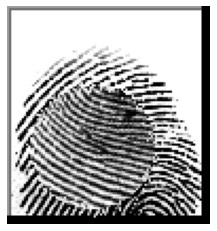

In [4]:
# Path to your fingerprint image and the sample image
sample = cv2.imread("C:/Users/dell/Downloads/SOCOFing/SOCOFing/Altered/Altered-Hard/150__M_Left_index_finger_CR.BMP")


# Check if the image was loaded successfully
if sample is not None:
    # Convert the image from BGR (OpenCV default) to RGB for displaying
    sample_rgb = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
    
    # Displaying the image using matplotlib
    plt.imshow(sample_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.show()

### Initializing SIFT detector

In [5]:
sift = cv2.SIFT_create()

#initilaise variables 
best_score = 0
filename = None
image = None
kp1, kp2, mp = None, None, None

### Loading real fingerprint images

In [6]:
# Getting list of real fingerprint images from the "Real" folder
real_images = glob.glob("C:/Users/dell/Downloads/SOCOFing/Real/*.BMP")  # Using glob to list images

# Checking images were found and counting them
image_count = len(real_images)

if image_count == 0:
    print("No images found in the specified directory.")
else:
    print(f"Number of images found: {image_count}")

Number of images found: 6000


### Matching fingerprints with SIFT

In [7]:
# Iterate over the real fingerprint images
for file in real_images[:1000]:  # Limit to first 1000 files (can adjust if needed)
    # Load each real fingerprint image
    fingerprint_image = cv2.imread(file)
    
    # Compute keypoints and descriptors for both images
    keypoints_1, descriptors_1 = sift.detectAndCompute(sample, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(fingerprint_image, None)
    

    # Define parameters for FLANN-based matcher
    index_params = dict(algorithm=1, trees=10)  # FLANN parameters
    search_params = dict()  # Empty dictionary
    flann = cv2.FlannBasedMatcher(index_params, search_params)

     # Perform K-Nearest Neighbors matching (k=2)
    matches = flann.knnMatch(descriptors_1, descriptors_2, k=2)
    
    # Apply Lowe's ratio test to filter good matches
    match_points = []
    for p, q in matches:
        if p.distance < 0.1 * q.distance:  # Ratio test
            match_points.append(p)

    # Calculate number of keypoints in both images
    keypoints = min(len(keypoints_1), len(keypoints_2))

    # Compute match score and find the best match
    if len(match_points) / keypoints * 100 > best_score:
        best_score = len(match_points) / keypoints * 100
        filename = file
        image = fingerprint_image
        kp1, kp2, mp = keypoints_1, keypoints_2, match_points

### Visualizing keypoints in the sample image

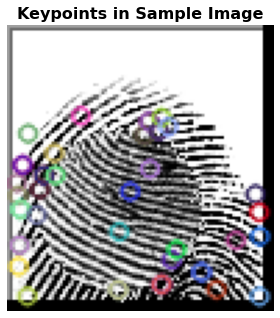

In [12]:
    keypoints_1, descriptors_1 = sift.detectAndCompute(sample, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(fingerprint_image, None)
    
    
    
    
    #Key points in visualisation 
    keypoint_image = cv2.drawKeypoints(sample, keypoints_1, None)
    
 ##displaying best match

# Display the image using Matplotlib
plt.figure(figsize=(4, 5))
plt.imshow(cv2.cvtColor(keypoint_image, cv2.COLOR_BGR2RGB))
plt.title('Keypoints in Sample Image', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

## Displaying best match

### Drawing matches btwn Sample and Best matching fingerprint

BEST MATCH: C:/Users/dell/Downloads/SOCOFing/Real\150__M_Left_index_finger.BMP
SCORE: 20.51282051282051


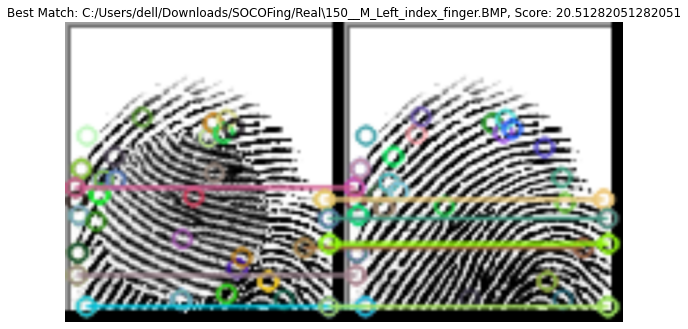

In [9]:
# Print the best match filename and score
print("BEST MATCH: " + filename)

print("SCORE: " + str(best_score))



# Draw matches between the sample and the best-matching fingerprint
result = cv2.drawMatches(sample, kp1, image, kp2, mp, None)
result = cv2.resize(result,None, fx=4, fy=4) 



# Display the result using matplotlib in Jupyter Notebook
plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.title(f"Best Match: {filename}, Score: {best_score}")
plt.axis('off')  # Hide axes for better visualization
plt.show()

## Conclusion

This project successfully demonstrates how to use the **SIFT** algorithm for fingerprint recognition, which can be applied in various security and biometric identification systems.
By detecting keypoints and matching descriptors between sample and real images, it ensures robust matching regardless of scaling, rotation, or affine transformations.
